In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the CNN model
model = Sequential()

# Step 1: Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 2: Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3: Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 4: Flatten the layers
model.add(Flatten())

# Step 5: Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to reduce overfitting

# Step 6: Output Layer
model.add(Dense(7, activation='softmax'))  # 7 emotions (0-6)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Create data augmentation pipeline for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,  # Standardize to have mean zero
    featurewise_std_normalization=True,  # Standardize to have standard deviation of 1
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For testing/validation, we don't augment data, just rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow data from directories with augmentation for training and rescaling for testing
train_generator = train_datagen.flow_from_directory(
    'C:\\Users\\subba\\Downloads\\archive (2)\\train',  # Your training data path
    target_size=(48, 48),
    color_mode='grayscale',  # Use grayscale for FER-2013
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    'C:\\Users\\subba\\Downloads\\archive (2)\\test',  # Your testing data path
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Fit the standardization parameters on a batch of data
sample_data = next(train_generator)[0]  # Get a batch of images
train_datagen.fit(sample_data)

# Train the model using the augmented data
history = model.fit(
    train_generator,  # Training data generator
    epochs=1,  # Adjust the number of epochs as needed
    validation_data=test_generator,  # Validation data generator
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=test_generator.samples // test_generator.batch_size
)

# Save the trained model
model.save('trained_model.h5')


C:\Users\subba\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


C:\Users\subba\AppData\Roaming\Python\Python312\site-packages\keras\src\legacy\preprocessing\image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\subba\AppData\Roaming\Python\Python312\site-packages\keras\src\legacy\preprocessing\image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\subba\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 201s 221ms/step - accuracy: 0.2289 - loss: 8.0976 - val_accuracy: 0.2475 - val_loss: 1.9259


In [3]:
from tensorflow.keras.models import load_model

# Load the trained model from the file
model = load_model('trained_model.h5')

# Now the model is ready for predictions or evaluations

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the directory where the FER-2013 dataset is located
train_dir = 'C:\\Users\\subba\\Downloads\\archive (2)\\train'  # Path to the training directory
test_dir = 'C:\\Users\\subba\\Downloads\\archive (2)\\test'    # Path to the test directory

# Create an ImageDataGenerator for the training and testing sets
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale images to [0, 1]
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),  # Resize images to 48x48
    batch_size=32,
    color_mode='grayscale',  # Grayscale images
    class_mode='categorical',  # Since it's multi-class classification
    shuffle=True
)

# Load the testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),  # Resize images to 48x48
    batch_size=32,
    color_mode='grayscale',  # Grayscale images
    class_mode='categorical',  # Since it's multi-class classification
    shuffle=False
)

# Check the class labels
print("Class labels:", train_generator.class_indices)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Class labels: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [5]:
# Evaluate the model using the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.2218 - loss: 1.9316
Test Accuracy: 24.71%


In [6]:
#Save the trained model so that you can load it later without retraining:
# Save the trained model to a file
model.save('emotion_detection_model.h5')
print("Model saved to 'emotion_detection_model.h5'")


Model saved to 'emotion_detection_model.h5'


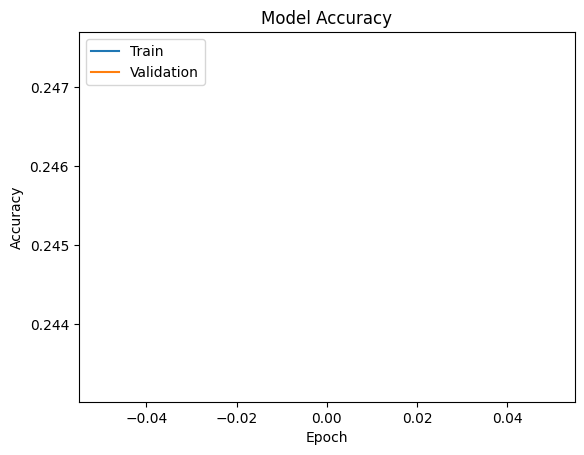

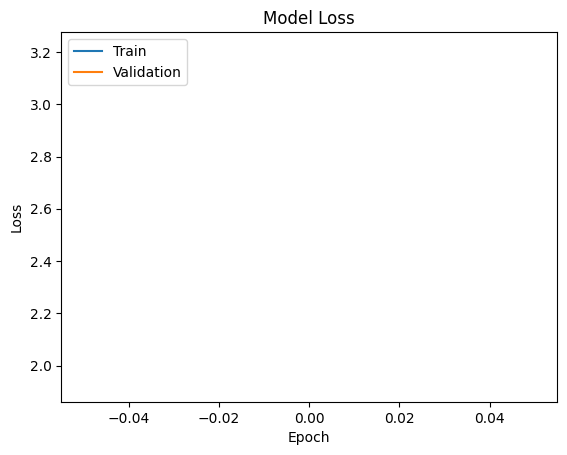

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Press 's' to capture an image and 'q' to quit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


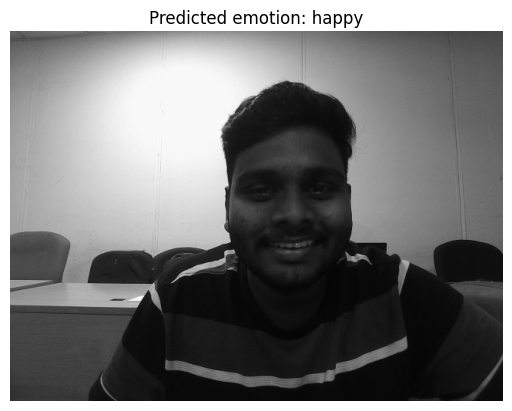

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to preprocess an image for prediction
def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    image = cv2.equalizeHist(image)  # Apply histogram equalization
    image = cv2.resize(image, (48, 48))  # Resize to 48x48
    image = image / 255.0  # Normalize
    image = image.reshape(1, 48, 48, 1)  # Add batch dimension
    return image

# Capture an image from the webcam
cap = cv2.VideoCapture(0)
print("Press 's' to capture an image and 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Display the frame
    cv2.imshow('Webcam Feed', frame)
    
    # Capture the image when 's' is pressed
    if cv2.waitKey(1) & 0xFF == ord('s'):
        captured_image = frame.copy()
        break
    # Exit the loop when 'q' is pressed
    elif cv2.waitKey(1) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        exit()

cap.release()
cv2.destroyAllWindows()

# Preprocess the captured image
preprocessed_image = preprocess_image(captured_image)

# Use the model to predict the emotion
prediction = model.predict(preprocessed_image)

# Map the predicted index to the class label
class_labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
predicted_class = np.argmax(prediction)  # Get the class with the highest probability

# Display the captured image and predicted emotion
captured_image_gray = cv2.cvtColor(captured_image, cv2.COLOR_BGR2GRAY)
plt.imshow(captured_image_gray, cmap='gray')
plt.title(f"Predicted emotion: {class_labels[predicted_class]}")
plt.axis('off')  # Hide axesS
plt.show()
